In [1]:
import os
import json
import numpy as np
import skimage.io as io
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
os.listdir()

['.ipynb_checkpoints', 'mappings.json', 'training.ipynb']

In [3]:
df_train = pd.read_csv('../data/all_combined/train.csv')
df_train

,Label,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202995,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202996,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202997,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202998,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('../data/all_combined/test.csv')
df_test

,Label,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34595,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34596,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34597,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34598,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train = df_train["Label"]
X_train = df_train.drop("Label", axis="columns")
Y_test = df_test["Label"]
X_test = df_test.drop("Label", axis="columns")

In [6]:
X_train = X_train.values.reshape(-1,32,32,1)
print(X_train.shape)
Y_train = Y_train.values.reshape(-1,1)
print(Y_train.shape)
X_test = X_test.values.reshape(-1,32,32,1)
print(X_test.shape)
Y_test = Y_test.values.reshape(-1,1)
print(Y_test.shape)

(203000, 32, 32, 1)
(203000, 1)
(34600, 32, 32, 1)
(34600, 1)


In [7]:
# Class to label mappings
with open("mappings.json") as f:
    json_dict = json.load(f)
mappings = {int(k): v for k, v in json_dict.items()}

In [8]:
# Scale down 0-255 pixels to 0-1 decimal numbers
X_train = X_train/255
X_test = X_test/255

In [9]:
# Shuffle dataset
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 0)

Hindi character व (va)


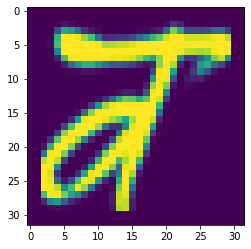

In [10]:
# Verify
plt.imshow(X_test[73].reshape(32, 32))
print(mappings[int(Y_test[73])])

In [11]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(13840, 32, 32, 1)
(20760, 32, 32, 1)


In [12]:
Y_test = keras.utils.to_categorical(Y_test)
print(Y_test.shape)

(13840, 73)


In [13]:
Y_val = keras.utils.to_categorical(Y_val)
print(Y_val.shape)

(20760, 73)


In [14]:
Y_train = keras.utils.to_categorical(Y_train)
print(Y_train.shape)

(203000, 73)


In [15]:
inputs = Input(shape = (32,32,1))
conv0 = Conv2D(64, 3, padding = 'same', activation ='relu')(inputs)
conv1 = Conv2D(64, 3, padding='same', activation='relu')(conv0)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(256, activation='relu')(dense0)
dense2 = Dense(73, activation='softmax')(dense1)

model = Model(inputs, dense2)
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_____________________________________________________

In [16]:
model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy']) #lr = .0001

In [17]:
history = model.fit(X_train, Y_train, epochs = 16, batch_size = 200, validation_data = (X_val, Y_val), verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 203000 samples, validate on 20760 samples
Epoch 1/16
203000/203000 [==============================] - 221s 1ms/step - loss: 0.6315 - accuracy: 0.8208 - val_loss: 0.1637 - val_accuracy: 0.9478
Epoch 2/16
203000/203000 [==============================] - 201s 988us/step - loss: 0.1338 - accuracy: 0.9551 - val_loss: 0.1467 - val_accuracy: 0.9518
Epoch 3/16
203000/203000 [==============================] - 199s 983us/step - loss: 0.1031 - accuracy: 0.9640 - val_loss: 0.1248 - val_accuracy: 0.9584
Epoch 4/16
203000/203000 [==============================] - 200s 984us/step - loss: 0.0872 - accuracy: 0.9688 - val_loss: 0.1312 - val_accuracy: 0.9585
Epoch 5/16
203000/203000 [==============================] - 200s 983us/step - loss: 0.0775 - accuracy: 0.9714 - val_loss: 0.1524 - val_accuracy: 0.9557
Epoch 6/16
203000/203000 [==============================] - 200s 983us/step - loss: 0.0697 - accuracy: 0.9737 - val_loss: 0.1308 - val_accuracy

In [18]:
model.save('model.h5')

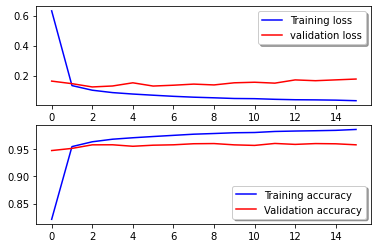

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
model.evaluate(X_test, Y_test, batch_size = 200, verbose =1)

13840/13840 [==============================] - 5s 362us/step


[0.16028798949727088, 0.9597543478012085]

In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
predicted = model.predict(x = X_test, verbose = 1)

13840/13840 [==============================] - 6s 420us/step


In [23]:
maxpredicted = np.argmax(predicted, axis = 1)

English character n/N


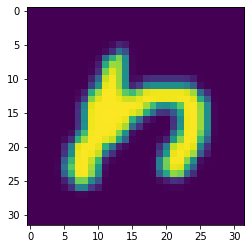

In [24]:
index = 100
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
print(mappings[maxpredicted[index]])